# Importing libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [38]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [39]:
train.shape , test.shape

((31647, 18), (13564, 17))

In [40]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [41]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [42]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [43]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


# Variable Identification

In [44]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

# Univariate analysis

In [45]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [46]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [47]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:>

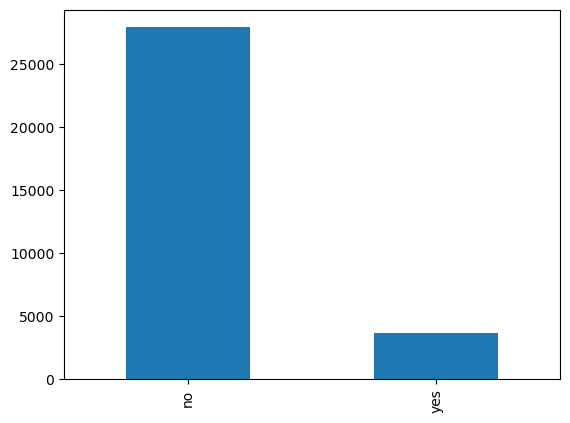

In [48]:
train['subscribed'].value_counts().plot.bar()

<AxesSubplot:>

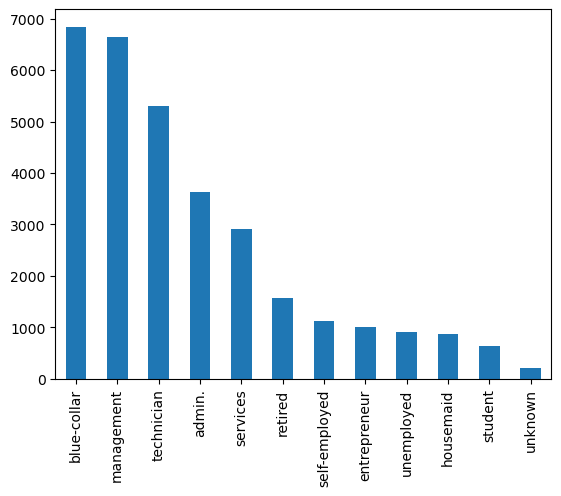

In [49]:
train['job'].value_counts().plot.bar()

<AxesSubplot:xlabel='job'>

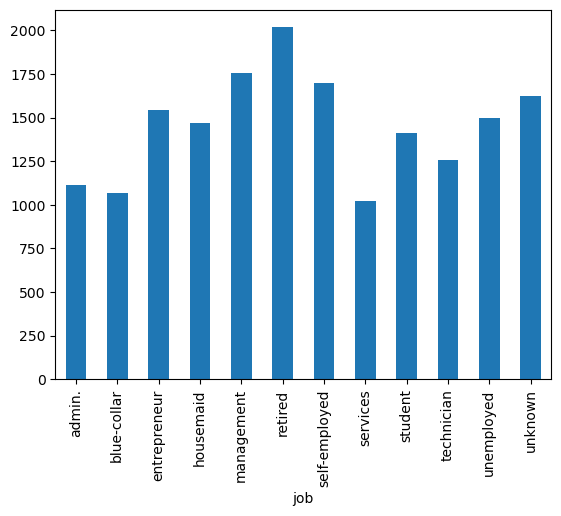

In [50]:
train.groupby('job')['balance'].mean().plot.bar()

<AxesSubplot:>

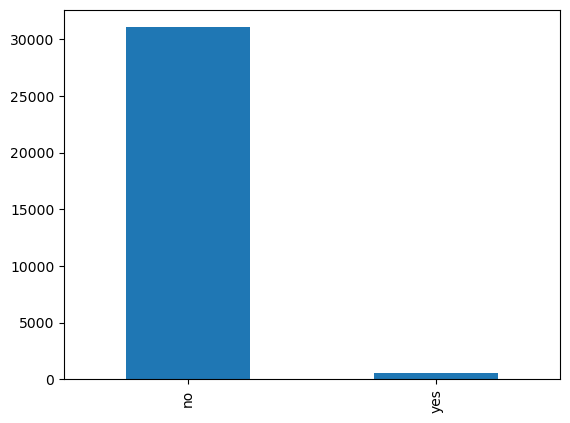

In [51]:
train['default'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

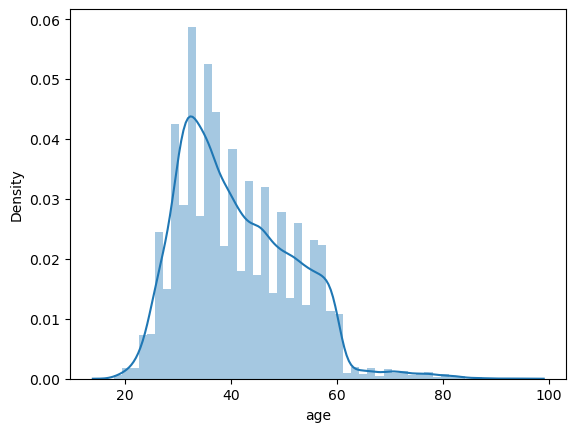

In [52]:
sns.distplot(train['age'])

# Bivariate Analysis

In [53]:
pd.crosstab(train['job'],train['subscribed'])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


Text(0, 0.5, 'Percentage')

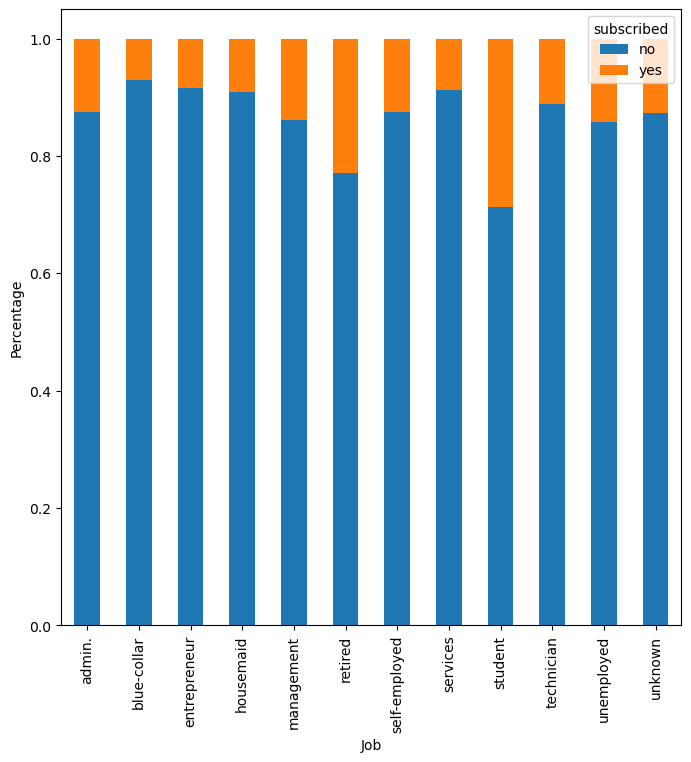

In [54]:
job = pd.crosstab(train['job'],train['subscribed'])

job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [55]:
pd.crosstab(train['default'],train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


Text(0, 0.5, 'Percentage')

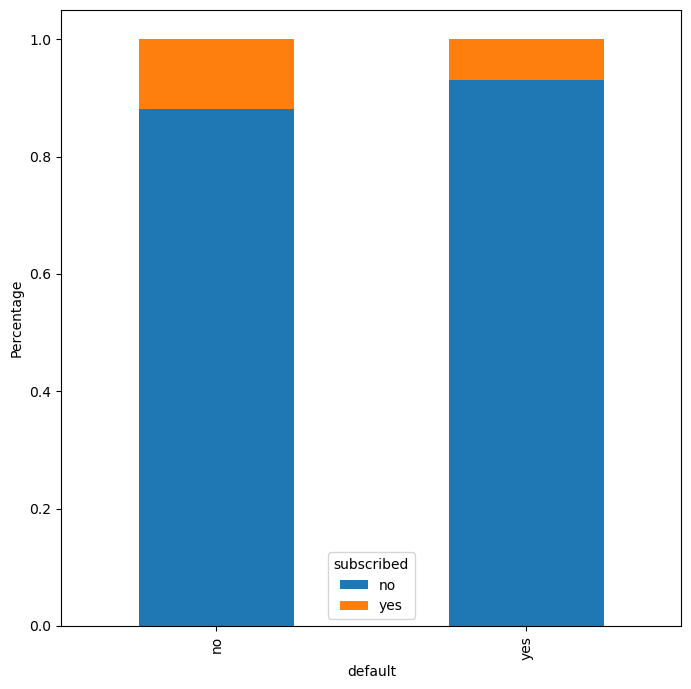

In [56]:
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [57]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [58]:
corr = train.corr()

<AxesSubplot:>

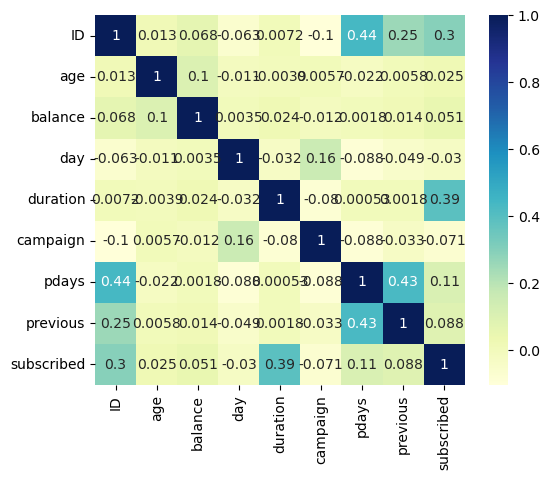

In [59]:
sns.heatmap(corr,square=True,annot=True,cmap="YlGnBu")

In [60]:
train.isnull().any()

ID            False
age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
subscribed    False
dtype: bool

# Model training


In [61]:
target = train['subscribed']
train = train.drop('subscribed',axis=1)

In [64]:
train = pd.get_dummies(train)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train,target,test_size = 0.2)

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lreg = LogisticRegression()

In [68]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [70]:
pred = lreg.predict(X_val)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,pred)


0.8903633491311217

# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
clf = DecisionTreeClassifier(max_depth=5)

In [76]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [77]:
pred = clf.predict(X_val)

In [78]:
accuracy_score(y_val,pred)

0.9044233807266983

In [79]:
test = pd.get_dummies(test)

In [80]:
test_prediction = clf.predict(test)

# Saving predictions

In [88]:
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [89]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [90]:
submission.to_csv('submission1.csv',header=None,index=False)